In [1]:
%reset -f

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
#--------in-control specificity-------------------
df = pd.read_csv(r"/gpfs_projects/ravi.samala/OUT/2023_MLDrift/20230803-091724__input_list_file_with_output_scores.csv")

#----Cancer without denoising--------------------
df_cancer = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/EMBED-cancer-list/20230729-063052__input_list_file_with_output_scores.csv")

#-----without denoising-----out-of-control days---------
df_out = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/day61-20/20230830-105729__input_list_file_with_output_scores.csv")

#--------Wavelet - level7 Bayes uint16------------------------
df_wavel7_Bayes16 = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/denoised/p6-12k/wavelet-l7-u16/20231017-233737__input_list_file_with_output_scores.csv")

#--------Cancer list Wavelet - level7 Bayes uint16------------------------
df_wavel7_u16cancer = pd.read_csv(r"/gpfs_projects/ravi.samala/OUT/2023_Smriti/OUT/denoised/cancer-list/wavelet-l7-u16/20231020-152417__input_list_file_with_output_scores.csv")


In [18]:
#-------Original  Specificity-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
#threshold = 0.024
#threshold = 0.0333  sp 0.9039
FP = df[df['preds'] > threshold]
TN = df[df['preds'] < threshold]


print("Total rows:",     df.index.size)
print("#Below Threshold, TN:", TN.index.size)
print("#Above Threshold, FP:",FP.index.size)
print("%FPs", FP.index.size/df.index.size)
print("Original Specificity", TN.index.size/df.index.size)

Total rows: 28392
#Below Threshold, TN: 23793
#Above Threshold, FP: 4599
%FPs 0.16198224852071005
Original Specificity 0.8380177514792899


In [19]:
def calculate_specificity_ci(TN, FP, alpha=0.05):
    n = TN + FP
    specificity = TN / (TN + FP)
    z = 1.96  # for 95% confidence interval
    p_hat = (TN + (z**2) / (2 * n)) / (n + z**2 / n)
    se = np.sqrt(p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))
    lower_bound = (p_hat - z * se) / (1 + z**2 / n)
    upper_bound = (p_hat + z * se) / (1 + z**2 / n)
    return (lower_bound, upper_bound)

# Example values for TN and FP
TN = 23793
FP = 4599

# Calculate confidence interval for specificity
lower_bound, upper_bound = calculate_specificity_ci(TN, FP)
print("Specificity 95% CI: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Specificity 95% CI: [0.834, 0.842]


In [20]:
#--------Original Sensitivity-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
#threshold = 0.0333   #se0.6157
TP = df_cancer[df_cancer['preds'] > threshold]
FN = df_cancer[df_cancer['preds'] < threshold]


print("Total rows:",     df_cancer.index.size)
print("#Below Threshold FN", FN.index.size)
print("#Above Threshold TP",TP.index.size)
print("%FNs", FN.index.size/df_cancer.index.size)
sensitivity = TP.index.size/df_cancer.index.size
sensitivity
print("Original Sensitivity", sensitivity)

# Calculate 95% confidence interval for sensitivity
lower_bound, upper_bound = calculate_specificity_ci(TP.index.size, FN.index.size)
print("Sensitivity 95% CI: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

Total rows: 557
#Below Threshold FN 156
#Above Threshold TP 401
%FNs 0.2800718132854578
Original Sensitivity 0.7199281867145422
Sensitivity 95% CI: [0.678, 0.752]


In [21]:
import numpy as np

def calculate_sensitivity_ci(TP, FN, alpha=0.05):
    n = TP + FN
    sensitivity = TP / (TP + FN)
    z = 1.96  # for 95% confidence interval
    p_hat = (TP + (z**2) / (2 * n)) / (n + z**2 / n)
    se = np.sqrt(p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))
    lower_bound = (p_hat - z * se) / (1 + z**2 / n)
    upper_bound = (p_hat + z * se) / (1 + z**2 / n)
    return (lower_bound, upper_bound)

# Example values for TP and FN
TP = 401
FN = 156

# Calculate confidence interval for original sensitivity
lower_bound, upper_bound = calculate_sensitivity_ci(TP, FN)
print("Sensitivity 95% CI: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Sensitivity 95% CI: [0.678, 0.752]


In [22]:
#--------Denoised Specificity Wavelet Filter Bayes Level7 uint16-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
FP_Wave = df_wavel7_Bayes16[df_wavel7_Bayes16['preds'] > threshold]
TN_Wave = df_wavel7_Bayes16[df_wavel7_Bayes16['preds'] < threshold]


print("Total rows:",     df_wavel7_Bayes16.index.size)
print("#Below Threshold: TN", TN_Wave.index.size)
print("#Above Threshold: FP",FP_Wave.index.size)
print("%FPs", FP_Wave.index.size/df_wavel7_Bayes16.index.size)
print("Specificity after Wavelet Filtering:::", TN_Wave.index.size/df_wavel7_Bayes16.index.size)

# Calculate confidence interval for wavelet filtered specificity
lower_bound, upper_bound = calculate_specificity_ci(TN_Wave.index.size, FP_Wave.index.size)
print("Specificity after wavelet filtering 95% CI: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

Total rows: 28589
#Below Threshold: TN 22202
#Above Threshold: FP 6387
%FPs 0.22340760432334114
Specificity after Wavelet Filtering::: 0.7765923956766588
Specificity after wavelet filtering 95% CI: [0.772, 0.781]


In [23]:
#--------Denoised Sensitivity Wavelet Filter Bayes Level7 uint16-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
#threshold = 0.0333   #se0.6157
TP_Wave = df_wavel7_u16cancer[df_wavel7_u16cancer['preds'] > threshold]
FN_Wave = df_wavel7_u16cancer[df_wavel7_u16cancer['preds'] < threshold]


print("Total rows:",     df_wavel7_u16cancer.index.size)
print("#Below Threshold FN", FN_Wave.index.size)
print("#Above Threshold TP",TP_Wave.index.size)
print("%FNs", FN_Wave.index.size/df_wavel7_u16cancer.index.size)
sensitivity_wave = TP_Wave.index.size/df_wavel7_u16cancer.index.size
sensitivity_wave
print("Sensitivity After Wavelet filtering", sensitivity_wave)

# Calculate confidence interval for wavelet filtered sensitivity
lower_bound, upper_bound = calculate_sensitivity_ci(TP_Wave.index.size, FN_Wave.index.size)
print("Sensitivity after wavelet filtering 95% CI: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

Total rows: 557
#Below Threshold FN 132
#Above Threshold TP 425
%FNs 0.236983842010772
Sensitivity After Wavelet filtering 0.7630161579892281
Sensitivity after wavelet filtering 95% CI: [0.723, 0.793]


In [8]:
23.7+76.3

100.0

In [9]:
#Lables for Orignal positive and negative cases
df.columns
df['cancer']
df_cancer['cancer']
labels_negative = df['cancer']        #Cancer -ve
labels_positive = df_cancer['cancer'] #Cancer +ve
labels_pos      = np.ones(labels_positive.shape)
label_neg       = np.zeros(labels_negative.shape)
labels_o        = np.concatenate((labels_pos, label_neg))
labels_o.shape

(28949,)

In [10]:
#Predictions for Orignal positive and negative cases
df.columns
df['preds']
df_cancer['preds']
preds_negative = df['preds']
preds_positive = df_cancer['preds']
preds_o        = np.concatenate((preds_positive, preds_negative))
preds_o.shape

(28949,)

In [11]:
import sklearn
from sklearn.metrics import roc_auc_score

#Calculate AUC for original mammograms
AUC_o                 = roc_auc_score(labels_o,preds_o)
print("original AUC:", AUC_o)

original AUC: 0.861817758612055


In [ ]:
#----Calculate the 95% confidence interval for the Area Under the ROC Curve (AUC) using bootstrapping------------
#----Adjust the n_bootstraps parameter to control the number of bootstrap resamples
#----------------------------------------------------------------------------------------------------------------
#-Bootstrapping is a resampling method where you repeatedly sample with replacement from your
#-dataset to estimate the sampling distribution of a statistic

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

def calculate_auc_ci(y_true, y_scores, n_bootstraps=1000, alpha=0.05):
    aucs = []
    for _ in range(n_bootstraps):
        # Bootstrap resampling
        indices = np.random.choice(len(y_true), len(y_true), replace=True)
        y_true_boot = y_true[indices]
        y_scores_boot = y_scores[indices]
        # Calculate AUC
        auc = roc_auc_score(y_true_boot, y_scores_boot)
        aucs.append(auc)
    # Calculate confidence interval
    lower_bound = np.percentile(aucs, 100 * (alpha / 2))
    upper_bound = np.percentile(aucs, 100 * (1 - alpha / 2))
    return (lower_bound, upper_bound)

# Example true labels and predicted probabilities
# Replace these with your actual data
y_true = np.array([0, 1, 0, 1, 0])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.6])

In [12]:
#Lables for Filtered positive and negative cases
df_wavel7_Bayes16.columns
df_wavel7_Bayes16['cancer']
df_wavel7_u16cancer['cancer']
labels_n_wave = df_wavel7_Bayes16['cancer']        #Cancer -ve
labels_p_wave = df_wavel7_u16cancer['cancer']      #Cancer +ve
labels_pos_wave = np.ones(labels_p_wave.shape)
label_neg_wave  = np.zeros(labels_n_wave.shape)
labels_d        = np.concatenate((labels_pos_wave, label_neg_wave))
labels_d.shape

(29146,)

In [13]:
#Predictions for Filtered positive and negative cases
df_wavel7_Bayes16.columns
df_wavel7_Bayes16['preds']
df_wavel7_u16cancer['preds']
preds_neg_wave = df_wavel7_Bayes16['preds']
preds_pos_wave = df_wavel7_u16cancer['preds']
preds_d        = np.concatenate((preds_pos_wave, preds_neg_wave))
preds_d.shape

(29146,)

In [14]:
#Calculate AUC for after filtering/denoising
AUC_d                 = roc_auc_score(labels_d,preds_d)
print("Filtered AUC:", AUC_d)

Filtered AUC: 0.8559357269964788


In [15]:
# AI Scores : ground truth negative
o_neg_score      = df['preds']
wave_neg_score   = df_wavel7_Bayes16['preds']
num_neg_pre      = df.index.size
num_neg_post     = df_wavel7_Bayes16.index.size

# AI Scores : ground truth positive
o_pos_score      = df_cancer['preds']
wave_pos_score   = df_wavel7_u16cancer['preds']
num_pos          = df_cancer.index.size

#num_pos
#num_neg_pre
#num_neg_post

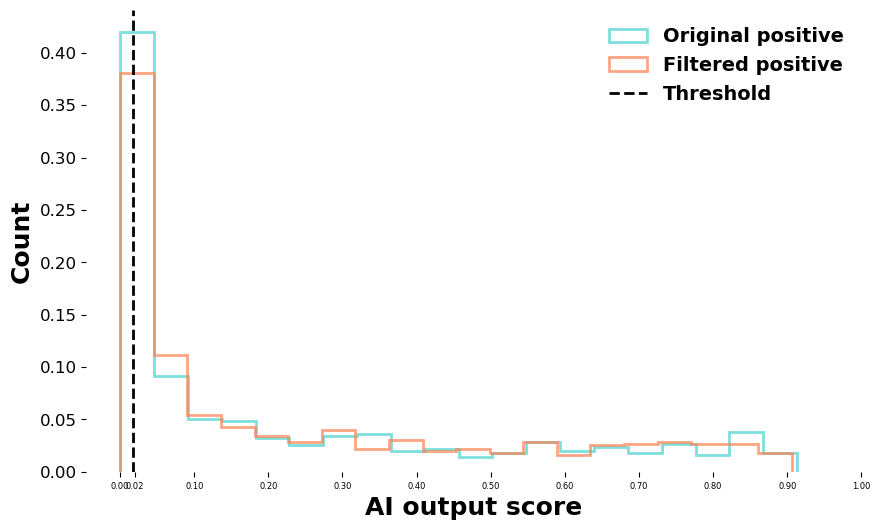

In [16]:
#Display the histogram of original positive cases

#import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(o_pos_score,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='bar', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

weights = np.ones_like(o_pos_score) / float(len(o_pos_score))
#count, bins, ignored = plt.hist(o_pos_score, weights=weights, color = "mediumturquoise", alpha=0.5, histtype='step', label='Original positive')
count, bins, ignored = plt.hist(o_pos_score, bins = 20, weights=weights, color = "mediumturquoise", alpha=0.7, histtype='step', linewidth=2.0, label='Original positive')


weights_f = np.ones_like(wave_pos_score) / float(len(wave_pos_score))
count, bins, ignored = plt.hist(wave_pos_score, bins = 20, weights=weights_f, color = "coral", alpha=0.7, histtype='step', linewidth=2.0,label='Filtered positive')

plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold', linewidth=2.0)  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])

plt.xticks([0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xlabel('AI output score', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=12)
ax.legend(fontsize=14, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

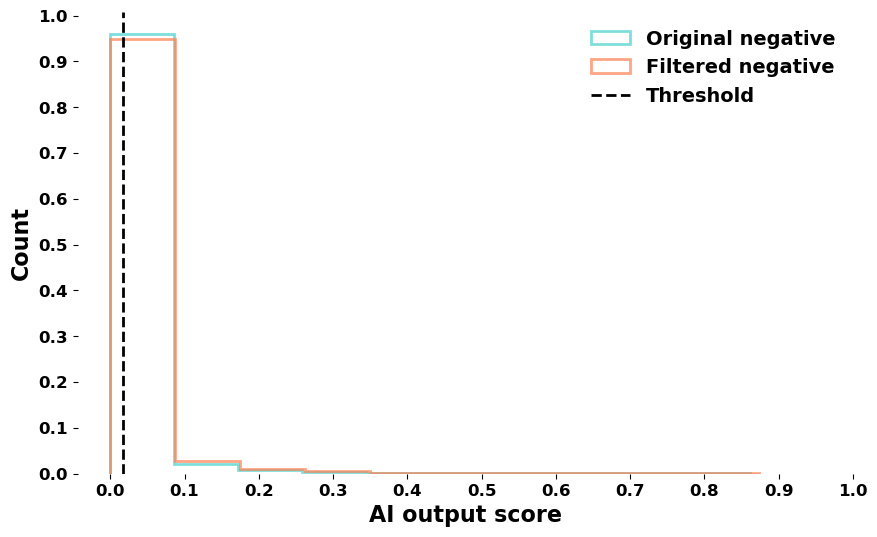

In [17]:
#Display the histogram of original negative cases

#import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(o_pos_score,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='bar', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

weights = np.ones_like(o_neg_score) / float(len(o_neg_score))
count, bins, ignored = plt.hist(o_neg_score, weights=weights, color = "mediumturquoise", alpha=0.7, histtype='step', linewidth=2.0, label='Original negative')

weights_fn = np.ones_like(wave_neg_score) / float(len(wave_neg_score))
count, bins, ignored = plt.hist(wave_neg_score, weights=weights_fn, color = "coral", alpha=0.7, histtype='step', linewidth=2.0, label='Filtered negative')


#count, bins, ignored = plt.hist(medk10_pos_score, weights=weights, color = "coral", alpha=0.3, label='Original positive')

plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold', linewidth=2.0)  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xlabel('AI output score', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.legend(fontsize=14, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()